In [1]:
### multinominal classification exercise 
## -> MNIST 예제를 이용해서 보완해야 하는 부분들을 알아보자 
## -> MNIST 는 '이미지를 학습하고 prediction' 하는 예제(28pixel*28pixel크기의 이미지들이 주어진다.)
## -> 각 이미지들은 사람이 '수기로 쓴 숫자' 들이 들어있다. 
## -> 1명당 0~9까지 숫자를 쓴 내용이 5만명 분이 들어있다. (50,000set x 10 = 500,000images)
## -> MNIST 의 결과물 multinomial 개수는 10개의 logistic을 가짐(0~9) 

# 필요한 module import 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data #데이터셋 불러오기용(.gz파일, unix계열 압축파일)

# Data Loading 
mnist = input_data.read_data_sets("./data/mnist", one_hot=True) #one_hot encoding상태로 받아올 수 있다! 
                                              #단, tf가 제공하는 형태이기 때문에 가능한것(다 되는건 아니다) 


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


In [10]:
# Data Loading이어서 
mnist.train.images # 학습용 데이터 불러오기 (2차원 array)
mnist.train.images.shape #(55000, 784)

#이미지데이터 -> x train data로 불러오기 

train_x_data_df = pd.DataFrame(mnist.train.images) #데이터 프레임으로 만들어
train_x_data_df.to_csv("./mnist_x_data.csv", index=False) #csv파일로 만들어버리자 

# x데이터의 각 column은(=각 pixel값은) 0과 1사이의 값으로 이미 scale이 되어있는 상태(채도 차이)
# 0과 가까울 수 록 흰색을 지칭, 1과 가까울 수 록 색상이 어두워진다. 

#숫자 데이터 -> y train data로 불러오기
train_y_data_df = pd.DataFrame(mnist.train.labels)
train_y_data_df.to_csv("./mnist_y_data.csv", index=False)


In [24]:
# tensorflow로 machine learning 

# placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias 
W = tf.Variable(tf.random_normal([784, 10]), name="weight") #가중치 7840개
b = tf.Variable(tf.random_normal([10]), name="bias")

# Hypothesis 
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit) #softmax 처음등장 (sigmoid 대신 probability 등장)

# cost function 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit, 
                                                                 labels = Y)) #버전 2로 고르자 
#train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.5).minimize(cost) 

#session 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [27]:
# 이제부터 학습할 땐 조심해야 한다! :데이터 사이즈가 비대하다(잘못돌리면 오래걸림)
# 학습 
train_epoch = 500 #데이터 사이즈를 보고 에폭수를 조정 
batch_size = 100 # (데이터를)몇개로 잘라서 할래? 내 pc가 가진 메모리, cpu에 따라 조정 
                 # (아무리 큰 데이터가들어와도 잘라서 처리할 수 있다.)
for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size) #tf 에서 지원(다른 문제에서는 구해야 한다.)
                                                              #X쪽 100개, Y쪽 100개를 반복 
        _, cost_val = sess.run([train, cost], 
                               feed_dict={X:batch_x, #ndarray로 넣는 편이 좋다 
                                          Y:batch_y})
    if step % 50 == 0:
        print("Cost값은 : {}".format(cost_val))



Cost값은 : 0.7083113193511963
Cost값은 : 0.1663648933172226
Cost값은 : 0.34958332777023315
Cost값은 : 0.1819928139448166
Cost값은 : 0.1751987338066101
Cost값은 : 0.2316340208053589
Cost값은 : 0.20302201807498932
Cost값은 : 0.11976692080497742
Cost값은 : 0.2696097791194916
Cost값은 : 0.1277509182691574


In [29]:
# 학습이 종료되었으니 정확도 측정 (학습과 분리)      
# Accuracy(정확도)
predict = tf.argmax(H,1) #출력되는 셋 중 가장 큰 값의 index번호를 리턴 
correct = tf.equal(predict, tf.argmax(Y, 1)) # predict와 correct가 맞으면 좋은 모델(위치를 가지고 비교)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도는 : {}".format(sess.run(accuracy, 
                                   feed_dict={X:mnist.test.images, 
                                              Y:mnist.test.labels})))




정확도는 : 0.920799970626831


Label : [3]
Predict : [3]


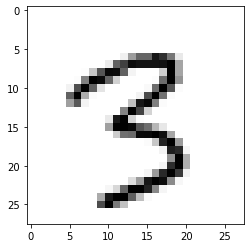

In [62]:
# Prediction 
# 랜덤으로 하나의 데이터를 추출해서 그놈을 이용해서 prediction을 한 후 결과를 비교해 보아요! 
r = np.random.randint(0,mnist.test.num_examples) #0부터 55000사이의 난수를튕김 
# 난수가 의미하는 행의 label값을 먼저 구해보아요! 

mnist.test.labels[r] # array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
                     # 요런 형태 
print("Label : {}" .format(sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1)))) 
#1차원의형태라서 axis=0밖에 못씀
#[r:r+1] = r번째 행이지만 차원형태를 위해 지칭
#print("Label : {}" .format(sess.run(tf.argmax(mnist.test.labels[r], axis=0)))) ->이거랑 동일 
print("Predict : {}" .format(sess.run(tf.argmax(H,1), 
                      feed_dict={X:mnist.test.images[r:r+1]})))
                        #2차원 placeholder와 차원을 맞춰주자 
                        #10번 중 한번골로 다른 결과가 다르게 나올 수도 있다.

#어떻게 생겼는지 보자     
#pyplot에 있는 imshow 메서드를 통해 이미지를 출력 
plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap="Greys") #그냥 그리면 알아서 컬러풀하게 해주니 따로 원본처럼 설정 

In [154]:
## kaggle데이터를 이용해서 문제를 풀어보자 
## tf내장 데이터셋이 아닌 실제 공모 데이터로 측정 

# 필요한 module import 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder

# Data Loading 
train_mnist = pd.read_csv("./data/digit-recognizer/train.csv")
test_mnist = pd.read_csv("./data/digit-recognizer/test.csv")


In [155]:
#최초확인
#print(train_mnist.shape)
#print(train_mnist.head(1))

# 라벨 col럼 분리하기 
train_x_data = train_mnist.drop("label",axis=1)
train_y_data = train_mnist["label"]
train_x_data.shape #(42000, 784)
train_y_data.shape #42000


# Y(숫자라벨) 데이터형태 변화 -> 2차원 ndarray
#np.unique(train_y_data) #array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)


(42000,)

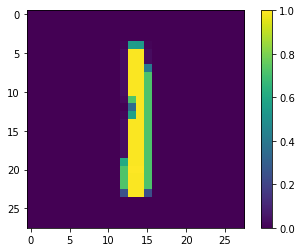

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


'\n#데이터 타입 변환 \ntrain_x_data = train_x_data.values.reshape([-1,1])\ntrain_y_data = train_y_data.values.reshape([-1,1])\ntrain_x_data.shape\n'

In [157]:
# Data process 
# 정의역 전처리 
plot_image = train_x_data.values.reshape(train_x_data.shape[0], 28, 28)

#정의역 특정데이터 이미지 확인 
plt.figure()
plt.imshow(plot_image[2])
plt.colorbar()
plt.grid(False)
plt.show()

# 0~1사이로 범위지정(학습하기 좋게 쪼개기)
train_x_data = train_x_data / 255.0
test_mnist = test_mnist / 255.0
#print(train_x_data)
#print(test_mnist)

#공역 One_Hot Encoding
train_y_data = pd.get_dummies(train_y_data) #(42000, 10)



print(type(train_x_data))
print(type(train_y_data))

'''
#데이터 타입 변환 
train_x_data = train_x_data.values.reshape([-1,1])
train_y_data = train_y_data.values.reshape([-1,1])
train_x_data.shape
'''

In [158]:
# tensorflow로 machine learning 

# placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias 
W = tf.Variable(tf.random_normal([784, 10]), name="weight") #가중치 7840개
b = tf.Variable(tf.random_normal([10]), name="bias")

# Hypothesis 
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit) #softmax 처음등장 (sigmoid 대신 probability 등장)

# cost function 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit, 
                                                                 labels = Y)) #버전 2로 고르자 
#train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.5).minimize(cost) 

#session 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [163]:

# 학습 
train_epoch = 50 
batch_size = 100 
for step in range(train_epoch):
    num_of_iter = int( train_x_data.shape[0] / batch_size)
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x, batch_y = train_x_data[i*batch_size:i*batch_size+batch_size],train_y_data[i*batch_size:i*batch_size+batch_size] 
        
        
        _, cost_val = sess.run([train, cost], 
                               feed_dict={X:batch_x, #ndarray로 넣는 편이 좋다 
                                          Y:batch_y})
        if step % 50 == 0:
            print("Cost값은 : {}".format(cost_val))

result = sess.run(tf.argmax(H,1), 
                  feed_dict = {X : test_mnist})
print(np.array([result]))

Cost값은 : 1.8446931838989258
Cost값은 : 1.8997782468795776
Cost값은 : 1.795259952545166
Cost값은 : 1.8737612962722778
Cost값은 : 1.8589887619018555
Cost값은 : 1.8575539588928223
Cost값은 : 1.8748114109039307
Cost값은 : 1.8822942972183228
Cost값은 : 1.8301352262496948
Cost값은 : 1.8440451622009277
Cost값은 : 1.891868233680725
Cost값은 : 1.8800055980682373
Cost값은 : 1.8560906648635864
Cost값은 : 1.8524987697601318
Cost값은 : 1.7908527851104736
Cost값은 : 1.84955632686615
Cost값은 : 1.8428955078125
Cost값은 : 1.8878588676452637
Cost값은 : 1.8694729804992676
Cost값은 : 1.8407055139541626
Cost값은 : 1.8324928283691406
Cost값은 : 1.8578248023986816
Cost값은 : 1.8047878742218018
Cost값은 : 1.8588370084762573
Cost값은 : 1.8754472732543945
Cost값은 : 1.829787254333496
Cost값은 : 1.8109238147735596
Cost값은 : 1.8356175422668457
Cost값은 : 1.8442654609680176
Cost값은 : 1.9083044528961182
Cost값은 : 1.9255743026733398
Cost값은 : 1.779686689376831
Cost값은 : 1.8799505233764648
Cost값은 : 1.858534812927246
Cost값은 : 1.871951937675476
Cost값은 : 1.8974195718765259
Cos

Cost값은 : 1.87908935546875
Cost값은 : 1.8772988319396973
Cost값은 : 1.829431176185608
Cost값은 : 1.8093311786651611
Cost값은 : 1.838004469871521
Cost값은 : 1.8204007148742676
Cost값은 : 1.8519232273101807
[[2 0 1 ... 3 9 2]]


In [7]:
## retry
## 모듈을 이용한 전처리
#필요모듈 불러오기 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.preprocessing import MinMaxScaler

# 원본데이터 불러오기 
mnist = pd.read_csv("./data/digit-recognizer/train.csv")

#데이터 이원화, 분류 
train_num = int(mnist.shape[0] * 0.8)
test_num = mnist.shape[0] - train_num

train_data = mnist[:train_num]
test_data = mnist[train_num:]

#정의역, 공역 데이터 생성

#train x,y 데이터 
train_x_data = mnist.drop("label", axis = 1, inplace = False)[:train_num].values
test_x_data = mnist.drop("label",axis = 1, inplace = False)[train_num:].values

#train x,y 데이터
train_y_data = mnist['label'][:train_num].values
test_y_data = mnist['label'][train_num:].values 

#학습을 위한 정규화(x데이터)
scaler = MinMaxScaler()
train_x_data = scaler.fit_transform(train_x_data)
test_x_data=scaler.fit_transform(test_x_data)

#더미변수화(One-hot Encoding, y데이터 )
train_y_data = pd.get_dummies(train_y_data)
test_y_data = pd.get_dummies(test_y_data)

In [8]:
display(train_x_data)
display(type(train_x_data)) #numpy.ndarray
display(train_y_data)
display(type(train_y_data)) #pandas.core.frame.DataFrame

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

numpy.ndarray

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
33595,0,0,0,0,0,0,1,0,0,0
33596,1,0,0,0,0,0,0,0,0,0
33597,1,0,0,0,0,0,0,0,0,0
33598,0,0,1,0,0,0,0,0,0,0


pandas.core.frame.DataFrame

In [10]:
# tensorflow로 machine learning
# placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([784,10]), name="weight")
b = tf.Variable(tf.random_normal([10]), name="bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# Cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [15]:
# 학습 (batch 이용)
train_epoch = 300
batch_size = 100

for step in range(train_epoch):
    num_of_iter = int(train_num/batch_size) #전체행 / batch_size
    cost_val = 0
    for i in range(num_of_iter):
        batch_x = train_x_data[i*batch_size : (i+1)*batch_size]
        batch_y = train_y_data[i*batch_size : (i+1)*batch_size]
        _,cost_val = sess.run([train,cost],
                             feed_dict = {X:batch_x,
                                          Y:batch_y})
    if step % 30 == 0:
        print("Cost값은: {}".format(cost_val))

Cost값은: 1.9066394567489624
Cost값은: 0.5986630916595459
Cost값은: 0.4995289742946625
Cost값은: 0.46032989025115967
Cost값은: 0.4372672140598297
Cost값은: 0.4207300841808319
Cost값은: 0.407909631729126
Cost값은: 0.39765632152557373
Cost값은: 0.3892902433872223
Cost값은: 0.3823453485965729


In [17]:
# 정확도 측정 (test데이터 기반으로)
predict = tf.argmax(H, 1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print("정확도는 : {}".format(sess.run(accuracy,
                                     feed_dict = {X: test_x_data,
                                                  Y: test_y_data})))

정확도는 : 0.9177380800247192


Label : [1]
Predict :[1]


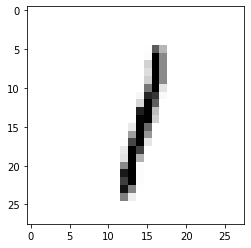

In [18]:
# Prediction
# 랜덤으로 하나의 데이터를 추출해서 그놈을 이용해서 prediction을 한 후 결과를 비교해 보자

r = np.random.randint(0,test_num) # mnist.test.num_examples = 10000

print("Label : {}".format(sess.run(tf.argmax(test_y_data[r:r+1], axis=1))))

print("Predict :{}".format(sess.run(tf.argmax(H,1), 
         feed_dict={X:test_x_data[r:r+1]})))    # 2차원

plt.imshow(test_x_data[r:r+1].reshape(28,28), cmap="Greys")
# 1,784 => 28,28로 바꿀거야

In [19]:
## 진짜 test 파일로 돌려보자!!

test_data = pd.read_csv("./data/digit-recognizer/test.csv")

# MinMax scaler가 min, max값 가지고 있다.
prediction_data = scaler.transform(test_data)

#sess.run(H,feed_dict={X:prediction_data})
result = sess.run(tf.argmax(H,1), feed_dict={X:prediction_data})
result

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [21]:
#결과 출력 내용 -> df -> .csv로 만들자
my_df = pd.DataFrame()
my_df["ImageId"] = range(1,test_data.shape[0]+1)
my_df["Label"] = result
my_df #(28000, 2)

my_df.to_csv("mnist_submission.csv",index=False)